<a href="https://colab.research.google.com/github/paolopetta/FIA-Yourbook/blob/main/Yourbook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
users = pd.read_csv('/content/drive/MyDrive/Users.csv', error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')

In [5]:
users.shape

(278858, 3)

In [6]:
books = pd.read_csv('/content/drive/MyDrive/Books.csv', error_bad_lines=False, delimiter=';', engine = 'python' , encoding = 'ISO-8859-1')

Skipping line 815: ';' expected after '"'
Skipping line 1679: ';' expected after '"'
Skipping line 2531: ';' expected after '"'
Skipping line 2640: ';' expected after '"'
Skipping line 3236: ';' expected after '"'
Skipping line 3256: ';' expected after '"'
Skipping line 4906: ';' expected after '"'
Skipping line 6452: ';' expected after '"'
Skipping line 8349: ';' expected after '"'
Skipping line 9669: ';' expected after '"'
Skipping line 9723: ';' expected after '"'
Skipping line 10010: ';' expected after '"'
Skipping line 10192: ';' expected after '"'
Skipping line 10754: ';' expected after '"'
Skipping line 10824: ';' expected after '"'
Skipping line 10862: ';' expected after '"'
Skipping line 11442: ';' expected after '"'
Skipping line 11584: ';' expected after '"'
Skipping line 11859: ';' expected after '"'
Skipping line 12206: ';' expected after '"'
Skipping line 12229: ';' expected after '"'
Skipping line 12719: ';' expected after '"'
Skipping line 12885: ';' expected after '"'


In [7]:
books.shape

(270491, 8)

In [8]:
ratings = pd.read_csv('/content/drive/MyDrive/Ratings.csv', error_bad_lines=False, delimiter=';', engine = 'python' , encoding = 'ISO-8859-1')

Skipping line 21689: ';' expected after '"'
Skipping line 45329: ';' expected after '"'
Skipping line 45330: ';' expected after '"'
Skipping line 183262: ';' expected after '"'
Skipping line 210093: ';' expected after '"'
Skipping line 531938: ';' expected after '"'
Skipping line 663237: ';' expected after '"'
Skipping line 824822: ';' expected after '"'
Skipping line 877349: ';' expected after '"'
Skipping line 941679: ';' expected after '"'
Skipping line 1134132: ';' expected after '"'
Skipping line 1145176: ';' expected after '"'
Skipping line 1145177: ';' expected after '"'
Skipping line 1148551: ';' expected after '"'


In [9]:
ratings.shape

(1149766, 3)

In [10]:
data = pd.merge(ratings, users, on='User-ID', how='inner')

In [11]:
data = pd.merge(data, books, on='ISBN', how='inner')

In [12]:
data.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Location', 'Age', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [13]:
data.corr()

,User-ID,Book-Rating,Age,Year-Of-Publication
User-ID,1.000000,-0.044026,-0.013561,0.004560
Book-Rating,-0.044026,1.000000,-0.025292,-0.007793
Age,-0.013561,-0.025292,1.000000,0.014435
Year-Of-Publication,0.004560,-0.007793,0.014435,1.000000


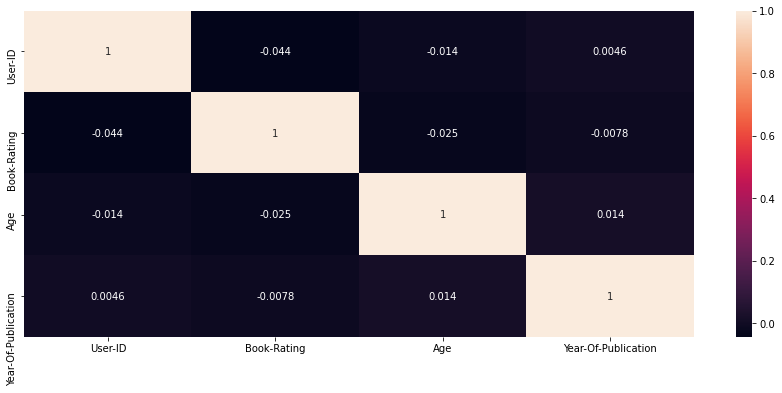

In [14]:
plt.figure(figsize = (15,6))
sns.heatmap( data.corr(), annot=True)

In [15]:
#sns.pairplot(data)
#plt.show()

In [16]:
#plt.figure(figsize = (15,4))
#sns.boxplot(data = data, orient = "v")
#plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


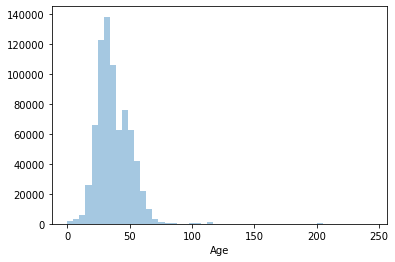

In [17]:
sns.distplot(data['Age'].dropna(), kde=False)

In [18]:
data['Year-Of-Publication'] = pd.to_numeric(data['Year-Of-Publication'], 'coerce').fillna(2099, downcast = 'infer')

In [19]:
data['Book-Rating'] = data['Book-Rating'].replace(0, None)

In [20]:
data['Age'] = np.where(data['Age']>90, None, data['Age'])

In [21]:
data[['Book-Author', 'Publisher']] = data[['Book-Author', 'Publisher']].fillna('Unknown')

In [22]:
data[['Book-Author', 'Publisher']].isnull().sum()

Book-Author    0
Publisher      0
dtype: int64

In [23]:
#Controlla e sistema utenti con etá null
median = data["Age"].median()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()
rand_age = np.random.randint(median - std, median + std, size = is_null)
age_slice = data["Age"].copy()
age_slice[pd.isnull(age_slice)] = rand_age
data["Age"] = age_slice
data["Age"] = data["Age"].astype(int)

In [24]:
#Controllo se sono rimaste etá a null
data['Age'].isnull().sum()

0

In [25]:
#Separo paese, regione, nazione e prendo soltanto il primo 
data['Country'] = data['Location'].apply(lambda row: str(row).split(',')[-1])

In [26]:
#Mantengo solo la nazione
data = data.drop('Location', axis=1)

In [27]:
data['Country'].head()

0     usa
1     usa
2     usa
3     usa
4     usa
Name: Country, dtype: object

In [28]:
df = data
# Relevant score
df = df[df['Book-Rating'] >= 6]

In [29]:
# Check
df.groupby('ISBN')['User-ID'].count().describe()

count    228259.000000
mean          3.731572
std          12.420819
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        1206.000000
Name: User-ID, dtype: float64

In [30]:
df = df.groupby('ISBN').filter(lambda x: len(x) >= 5)

In [31]:
df.groupby('User-ID')['ISBN'].count().describe()

count    66453.000000
mean         8.227770
std         50.589459
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       5830.000000
Name: ISBN, dtype: float64

In [32]:
df = df.groupby('User-ID').filter(lambda x: len(x) >= 5)

In [33]:
df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Age', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L', 'Country'],
      dtype='object')

In [34]:
data1= df.copy()
df.drop(['Book-Title','Publisher','Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)

In [35]:
df.head()

,User-ID,ISBN,Book-Rating,Age,Book-Author,Year-Of-Publication,Country
4,10314,034545104X,9,29,M. J. Rose,2002,usa
5,23768,034545104X,9,45,M. J. Rose,2002,usa
7,28523,034545104X,9,24,M. J. Rose,2002,usa
10,56157,034545104X,9,36,M. J. Rose,2002,usa
14,77480,034545104X,8,51,M. J. Rose,2002,usa


In [ ]:
data_encoded = pd.get_dummies(df)